In [ ]:
##University Id: 2408186
##Student Name: Bandana Yadav

# Problem - 1: Getting Started with Data Exploration
## 1. Data Exploration and Understanding:
   ### • Dataset Overview:

In [68]:
import pandas as pd
file_path = "WHR-2024-5CS037.csv"
data = pd.read_csv(file_path)

print("First 10 rows of the dataset:")
print(data.head(10))


First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

### 2. Identify the number of rows and columns in the dataset.

In [70]:
print(data.shape)

(143, 9)


### 3. List all the columns and their data types.

In [72]:
print("\nColumns and their data types:")
print(data.dtypes)



Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


# Basic Statistics:
### 1. Calculate the mean, median, and standard deviation for the Score column.

In [74]:
import pandas as pd
score_mean = data['score'].mean()
score_median = data['score'].median()
score_std = data['score'].std()

print("\nStatistics for the 'score' column:")
print(f"Mean: {score_mean}")
print(f"Median: {score_median}")
print(f"Standard Deviation: {score_std}")



Statistics for the 'score' column:
Mean: 5.52758041958042
Median: 5.785
Standard Deviation: 1.1707165099442995


### 2. Identify the country with the highest and lowest happiness scores.

In [76]:
highest_score_country = data.loc[data['score'].idxmax()]
lowest_score_country = data.loc[data['score'].idxmin()]

print("\nCountry with the highest happiness score:")
print(f"{highest_score_country['Country name']} with a score of {highest_score_country['score']}")

print("\nCountry with the lowest happiness score:")
print(f"{lowest_score_country['Country name']} with a score of {lowest_score_country['score']}")



Country with the highest happiness score:
Finland with a score of 7.741

Country with the lowest happiness score:
Afghanistan with a score of 1.721


# Missing Values:

### 1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [78]:
missing_values = data.isnull().sum()

print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


# Filtering and Sorting:
### 1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [80]:
filtered_data = data[data['score'] > 7.5]

print("Countries with a Score greater than 7.5:")
print(filtered_data[['Country name', 'score']])


Countries with a Score greater than 7.5:
  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525


### 2. For the filtered dataset - Sort the dataset by GDP per capita in descending order and display the top 10 rows.

In [103]:
sorted_filtered_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False).head(10)

top_10_sorted_data = sorted_filtered_data

print("Top 10 countries with a score greater than 7.5, sorted by Log GDP per Capita:")
print(top_10_sorted_data[['Country name', 'score', 'Log GDP per capita']])
print(sorted_filtered_data)


Top 10 countries with a score greater than 7.5, sorted by Log GDP per Capita:
  Country name  score  Log GDP per capita
1      Denmark  7.583               1.908
2      Iceland  7.525               1.881
0      Finland  7.741               1.844
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


# Adding New Columns:
### 1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score

In [55]:
data['Happiness Category'] = pd.cut(data['score'],
    bins=[-float('inf'), 4, 6, float('inf')], 
    labels=['Low', 'Medium', 'High'])

print(data[['Country name', 'score', 'Happiness Category']].head(10))


  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


# 2. Data Visualizations:
### • Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

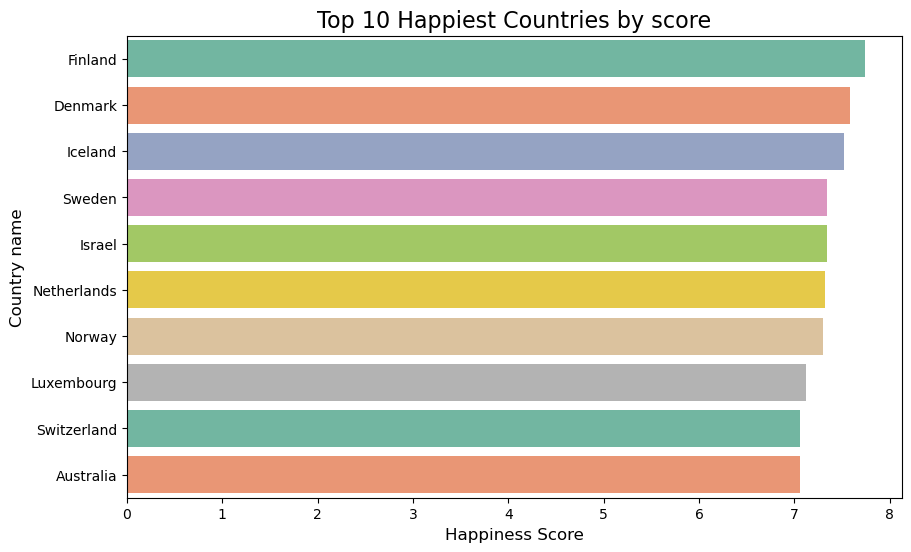

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_happiest_countries = data.sort_values(by='score', ascending=False).head(10)
colors = sns.color_palette("Set2", n_colors=len(top_10_happiest_countries))

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest_countries, hue='Country name', palette=colors, legend=False)

plt.title('Top 10 Happiest Countries by score', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Country name', fontsize=12)
plt.show()


### • Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

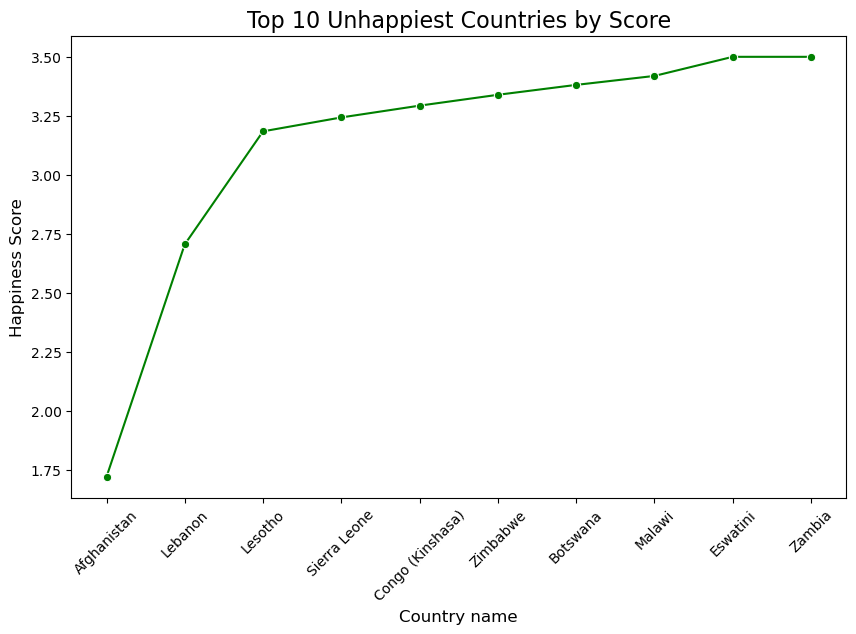

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_unhappiest_countries = data.sort_values(by='score', ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Country name', y='score', data=top_10_unhappiest_countries, marker='o', color='Green')

plt.title('Top 10 Unhappiest Countries by Score', fontsize=16)
plt.xlabel('Country name', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()


### • Plot a histogram for the Score column to show its distribution and also interpret.

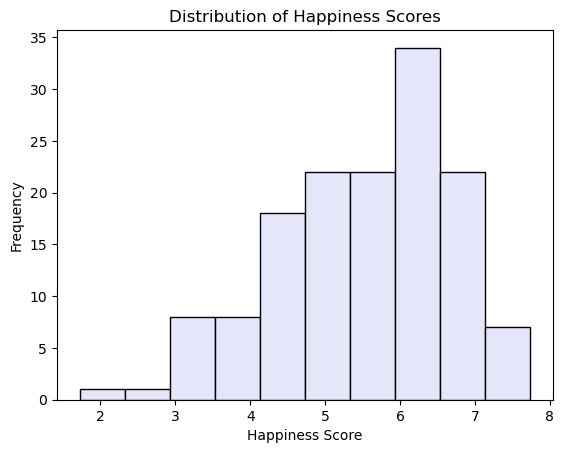

In [99]:
import matplotlib.pyplot as plt

plt.hist(data['score'], bins=10, color='lavender', edgecolor='black')

plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')

plt.show()


### • Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

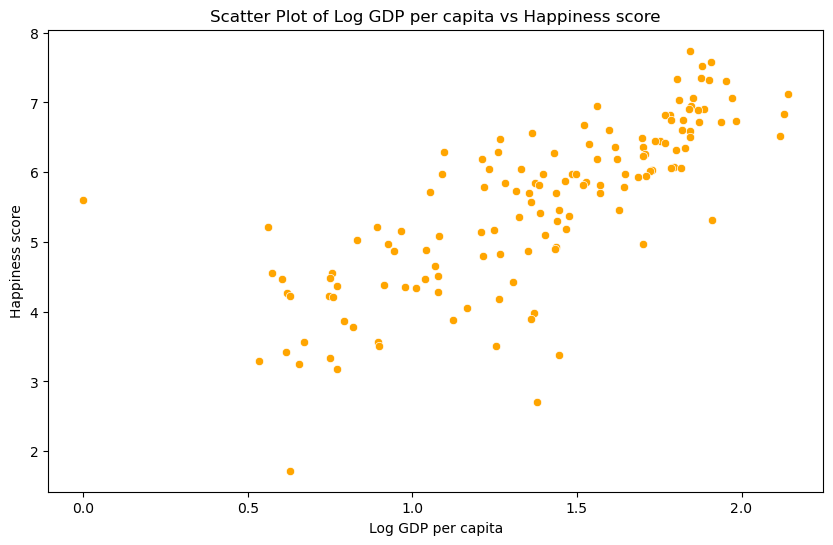

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data, color='orange')

plt.title('Scatter Plot of Log GDP per capita vs Happiness score')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness score')

plt.show()


# 3.2 Problem - 2
## Task - 1 - Setup Task - Preparing the South-Asia Dataset:
#### 1. Define the countries in South Asia with a list for example:south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]
#### 2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
#### 3. Save the filtered dataframe as separate CSV files for future use.

In [88]:
import pandas as pd
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", 
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

south_asia_df = data[data['Country name'].isin(south_asian_countries)]

south_asia_df.to_csv('south_asia_happiness_data.csv', index=False)

print("Filtered South Asia dataset saved as 'south_asia_happiness_data.csv'")


Filtered South Asia dataset saved as 'south_asia_happiness_data.csv'


# Task-2 - Composite Score Ranking:
### 1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:                Composite Score = 0.40 × GDP per Capita + 0.30 × SocialSupport+ 0.30 × Healthy Life Expectancy

In [34]:
south_asia_df.loc[:, 'Composite Score'] = 0.40 * south_asia_df['Log GDP per capita'] + 0.30 * south_asia_df['Social support'] + 0.30 * south_asia_df['Healthy life expectancy']

print(south_asia_df[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Composite Score']])


    Country name  Log GDP per capita  Social support  Healthy life expectancy  \
92         Nepal               0.965           0.990                    0.443   
107     Pakistan               1.069           0.600                    0.321   
125        India               1.166           0.653                    0.417   
127    Sri Lanka               1.361           1.179                    0.586   
128   Bangladesh               1.122           0.249                    0.513   
142  Afghanistan               0.628           0.000                    0.242   

     Composite Score  
92            0.8159  
107           0.7039  
125           0.7874  
127           1.0739  
128           0.6774  
142           0.3238  


### 2. Rank the South Asian countries based on the Composite Score in descending order.

In [36]:
ranked_south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)

print(ranked_south_asia_df[['Country name', 'Composite Score']])


    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


### 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

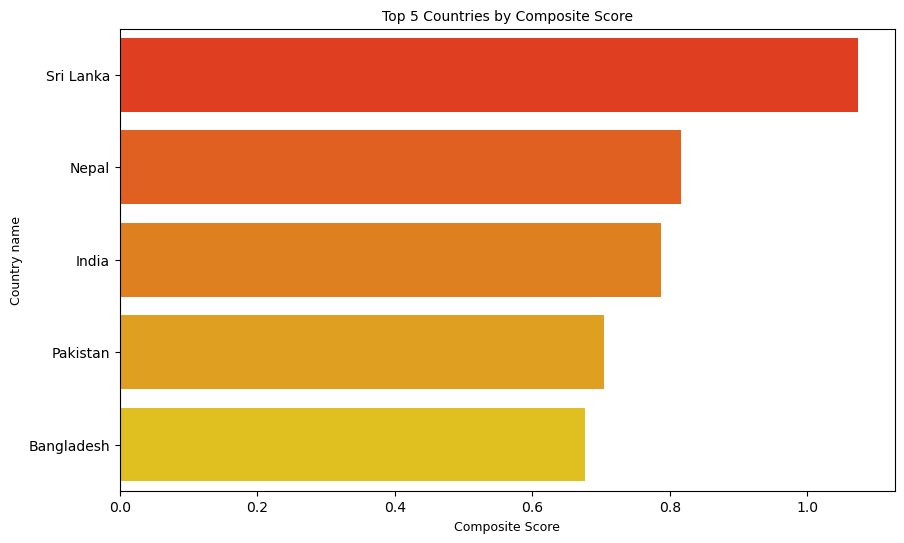

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

top_5 = ranked_south_asia_df.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5, palette='autumn', hue='Country name', legend=False)

plt.title('Top 5 Countries by Composite Score', fontsize=10)
plt.xlabel('Composite Score', fontsize=9)
plt.ylabel('Country name', fontsize=9)

plt.show()


### 4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.

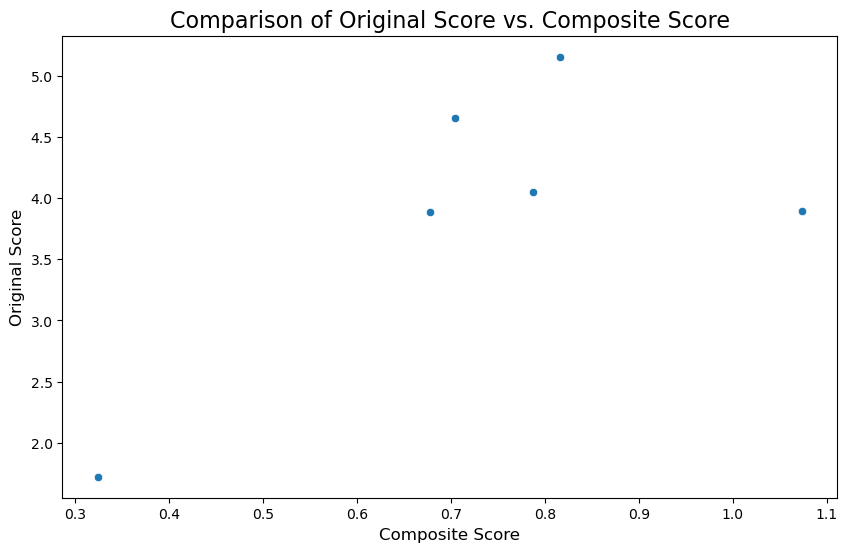

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

comparison_df = south_asia_df[['Country name', 'score', 'Composite Score']]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite Score', y='score', data=comparison_df)

plt.title('Comparison of Original Score vs. Composite Score', fontsize=16)
plt.xlabel('Composite Score', fontsize=12)
plt.ylabel('Original Score', fontsize=12)

plt.show()


# Task - 3 - Outlier Detection:
### 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [114]:
q1_score = south_asia_df['score'].quantile(0.25)
q3_score = south_asia_df['score'].quantile(0.75)
iqr_score = q3_score - q1_score
score_lower_bound = q1_score - 1.5 * iqr_score
score_upper_bound = q3_score + 1.5 * iqr_score
score_outliers = south_asia_df[(south_asia_df['score'] < score_lower_bound) | (south_asia_df['score'] > score_upper_bound)]

q1_gdp = south_asia_df['Log GDP per capita'].quantile(0.25)
q3_gdp = south_asia_df['Log GDP per capita'].quantile(0.75)
iqr_gdp = q3_gdp - q1_gdp
gdp_lower_bound = q1_gdp - 1.5 * iqr_gdp
gdp_upper_bound = q3_gdp + 1.5 * iqr_gdp
gdp_outliers = south_asia_df[(south_asia_df['Log GDP per capita'] < gdp_lower_bound) | (south_asia_df['Log GDP per capita'] > gdp_upper_bound)]

print("Score Outliers:")
print(score_outliers[['Country name', 'score']])
print("\nGDP Outliers:")
print(gdp_outliers[['Country name', 'Log GDP per capita']])


Score Outliers:
    Country name  score
142  Afghanistan  1.721

GDP Outliers:
    Country name  Log GDP per capita
142  Afghanistan               0.628


### 2. Define outliers using the 1.5 × IQR rule.

### 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.

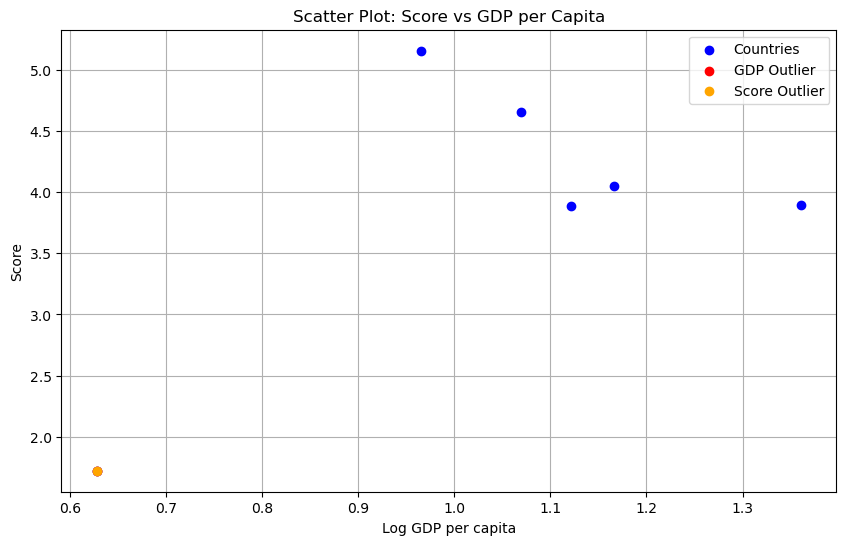

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], color='blue', label='Countries')

for i, row in gdp_outliers.iterrows():
    plt.scatter(row['Log GDP per capita'], row['score'], color='red', label='GDP Outlier' if i == gdp_outliers.index[0] else "")
    
for i, row in score_outliers.iterrows():
    plt.scatter(row['Log GDP per capita'], row['score'], color='orange', label='Score Outlier' if i == score_outliers.index[0] else "")

plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('Scatter Plot: Score vs GDP per Capita')
plt.legend()
plt.grid(True)

plt.show()


# Task-4 - Exploring Trends Across Metrics:
### 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.

In [147]:
metrics = south_asia_df[['score', 'Freedom to make life choices', 'Generosity']]

correlation_matrix = metrics.corr()
correlation_score_freedom = correlation_matrix.loc['score', 'Freedom to make life choices']
correlation_score_generosity = correlation_matrix.loc['score', 'Generosity']

print(f"Pearson correlation between Score and Freedom to Make Life Choices: {correlation_score_freedom}")
print(f"Pearson correlation between Score and Generosity: {correlation_score_generosity}")


Pearson correlation between Score and Freedom to Make Life Choices: 0.8005185224163315
Pearson correlation between Score and Generosity: 0.874512371253192


### 2. Create scatter plots with trendlines for these metrics against the Score.

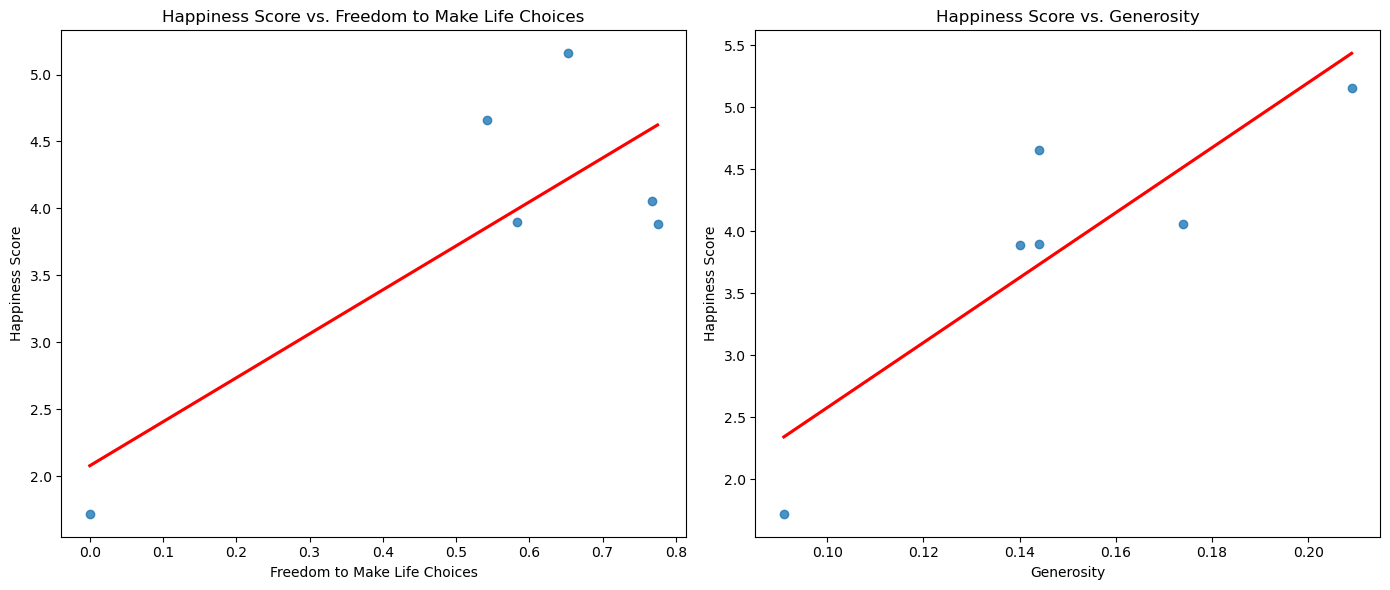

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.regplot(
    ax=axes[0],
    x=south_asia_df['Freedom to make life choices'],
    y=south_asia_df['score'],
    ci=None,
    line_kws={"color": "red"}
)
axes[0].set_title("Happiness Score vs. Freedom to Make Life Choices")
axes[0].set_xlabel("Freedom to Make Life Choices")
axes[0].set_ylabel("Happiness Score")

sns.regplot(
    ax=axes[1],
    x=south_asia_df['Generosity'],
    y=south_asia_df['score'],
    ci=None,
    line_kws={"color": "red"}
)
axes[1].set_title("Happiness Score vs. Generosity")
axes[1].set_xlabel("Generosity")
axes[1].set_ylabel("Happiness Score")

plt.tight_layout()
plt.show()


### 3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.

# Task - 5 - Gap Analysis:
### 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.

In [145]:
south_asia_df.loc[:, 'Log GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

print(south_asia_df.head())




    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual      Region  \
92                       0.115                1.783  South Asia   
107                      0.074            

### 2. Rank the South Asian countries by this gap in both ascending and descending order.

In [123]:
ascending_rank = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)

descending_rank = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

ascending_rank[['Country name', 'GDP-Score Gap']]
descending_rank[['Country name', 'GDP-Score Gap']]


,Country name,GDP-Score Gap
142,Afghanistan,-1.093
127,Sri Lanka,-2.537
128,Bangladesh,-2.764
125,India,-2.888
107,Pakistan,-3.588
92,Nepal,-4.193


### 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

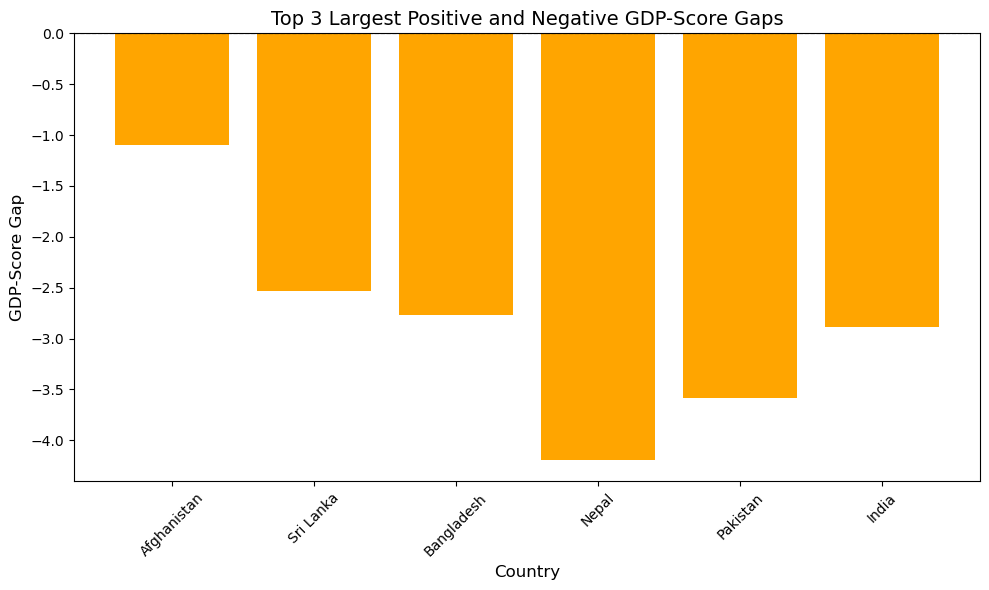

In [127]:
import matplotlib.pyplot as plt

south_asia_df_sorted_desc = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)
south_asia_df_sorted_asc = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)

top_positive_gaps = south_asia_df_sorted_desc.head(3)
top_negative_gaps = south_asia_df_sorted_asc.head(3)

top_gaps = pd.concat([top_positive_gaps, top_negative_gaps])

plt.figure(figsize=(10, 6))
bars = plt.bar(top_gaps['Country name'], top_gaps['GDP-Score Gap'], 
               color=['green' if x > 0 else 'orange' for x in top_gaps['GDP-Score Gap']])

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Top 3 Largest Positive and Negative GDP-Score Gaps', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP-Score Gap', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### 4. Analyze the reasons behind these gaps and their implications for South Asian countries.

# Problem-3 - Comparative Analysis:
### Task - 1 Preparing the Middle Eastern Dataset:
### 1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list: middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia","Syria","United Arab Emirates", "Yemen"]


# 1. Descriptive Statistics:
### • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

In [92]:
import pandas as pd

middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", 
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", 
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

middle_east_df = data[data['Country name'].isin(middle_east_countries)]

south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()

middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

print(f"South Asia - Mean Happiness Score: {south_asia_mean:.2f}, Standard Deviation: {south_asia_std:.2f}")
print(f"Middle East - Mean Happiness Score: {middle_east_mean:.2f}, Standard Deviation: {middle_east_std:.2f}")


South Asia - Mean Happiness Score: 3.90, Standard Deviation: 1.18
Middle East - Mean Happiness Score: 5.41, Standard Deviation: 1.57


### • Which region has higher happiness Scores on average?

# 2. Top and Bottom Performers:
### • Identify the top 3 and bottom 3 countries in each region based on the score.

In [46]:
top_3_south_asia = south_asia_df.sort_values(by='score', ascending=False).head(3)
bottom_3_south_asia = south_asia_df.sort_values(by='score').head(3)

top_3_middle_east = middle_east_df.sort_values(by='score', ascending=False).head(3)
bottom_3_middle_east = middle_east_df.sort_values(by='score').head(3)

print("Top 3 happiest countries in South Asia:")
print(top_3_south_asia[['Country name', 'score']])

print("\nBottom 3 happiest countries in South Asia:")
print(bottom_3_south_asia[['Country name', 'score']])

print("\nTop 3 happiest countries in Middle East:")
print(top_3_middle_east[['Country name', 'score']])

print("\nBottom 3 happiest countries in Middle East:")
print(bottom_3_middle_east[['Country name', 'score']])


Top 3 happiest countries in South Asia:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom 3 happiest countries in South Asia:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Top 3 happiest countries in Middle East:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 happiest countries in Middle East:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


### • Plot bar charts comparing these charts.

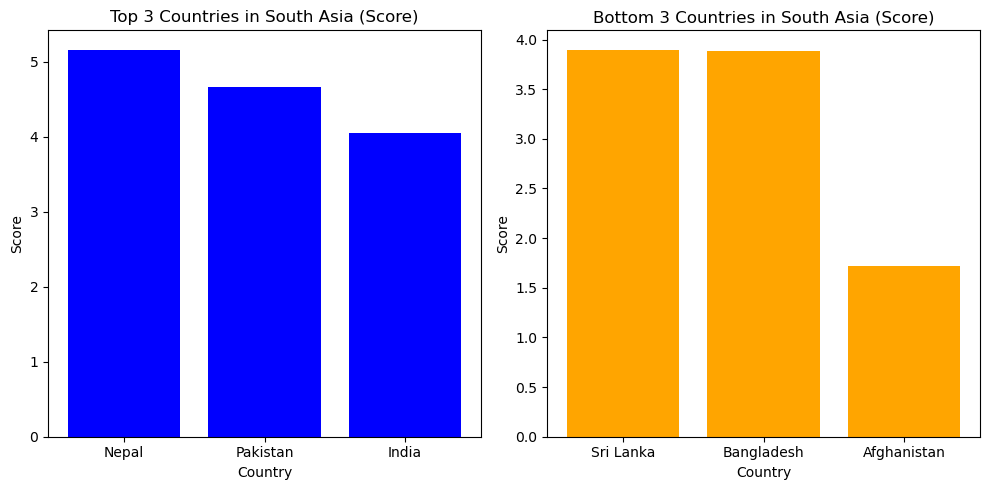

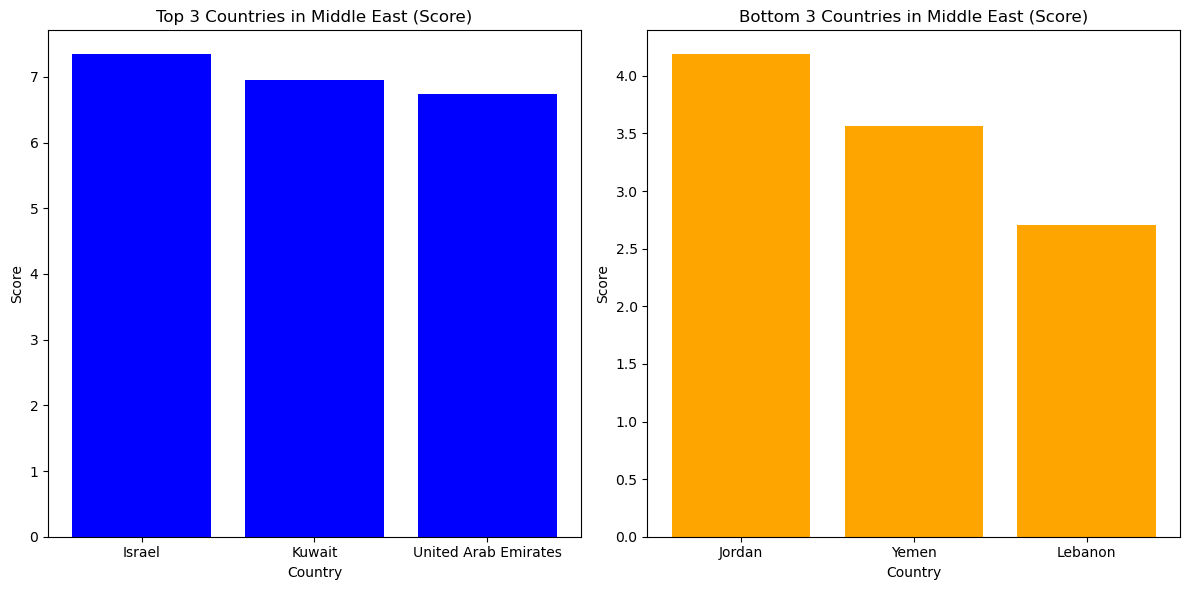

In [48]:
south_asia_sorted = south_asia_df.sort_values(by='score', ascending=False)
middle_east_sorted = middle_east_df.sort_values(by='score', ascending=False)

top_3_south_asia = south_asia_sorted.head(3)
bottom_3_south_asia = south_asia_sorted.tail(3)

top_3_middle_east = middle_east_sorted.head(3)
bottom_3_middle_east = middle_east_sorted.tail(3)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1) 
plt.bar(top_3_south_asia['Country name'], top_3_south_asia['score'], color='Blue')
plt.title('Top 3 Countries in South Asia (Score)')
plt.xlabel('Country')
plt.ylabel('Score')

plt.subplot(1, 2, 2)  
plt.bar(bottom_3_south_asia['Country name'], bottom_3_south_asia['score'], color='Orange')
plt.title('Bottom 3 Countries in South Asia (Score)')
plt.xlabel('Country')
plt.ylabel('Score')

plt.tight_layout()

# Middle East Bar Chart
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
plt.bar(top_3_middle_east['Country name'], top_3_middle_east['score'], color='Blue')
plt.title('Top 3 Countries in Middle East (Score)')
plt.xlabel('Country')
plt.ylabel('Score')

plt.subplot(1, 2, 2)  
plt.bar(bottom_3_middle_east['Country name'], bottom_3_middle_east['score'], color='Orange')
plt.title('Bottom 3 Countries in Middle East (Score)')
plt.xlabel('Country')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


# 3. Metric Comparisons:
### • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

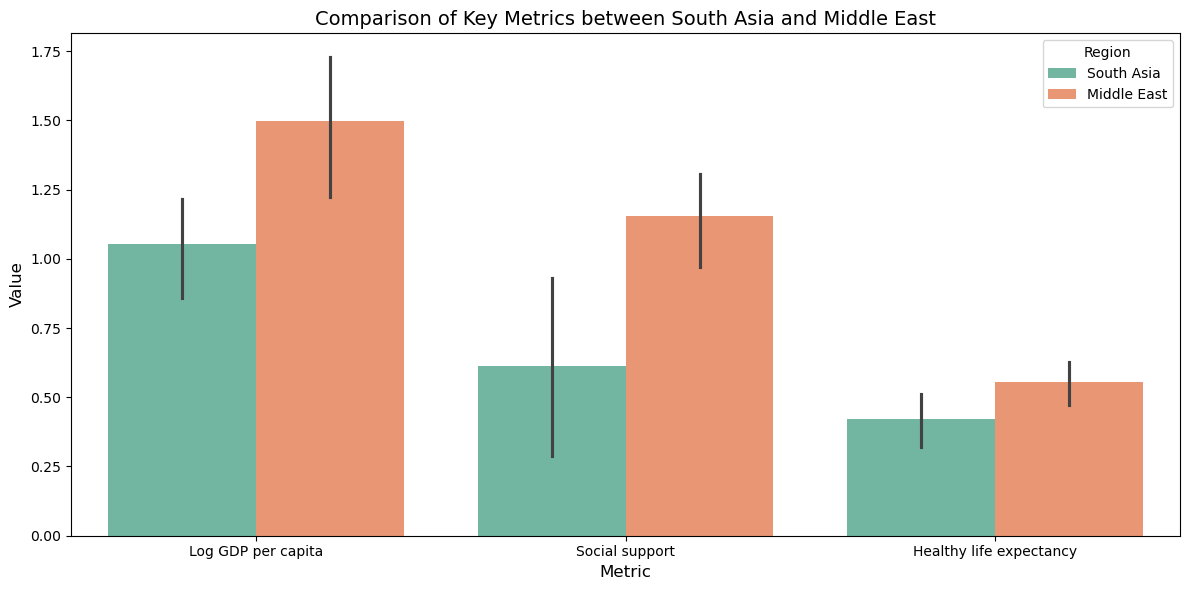

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

south_asia_df.loc[:, 'Region'] = 'South Asia'
middle_east_df.loc[:, 'Region'] = 'Middle East'

combined_df = pd.concat([south_asia_df[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Region']], 
                         middle_east_df[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Region']]])

melted_df = pd.melt(combined_df, id_vars=['Region'], value_vars=['Log GDP per capita', 'Social support', 'Healthy life expectancy'], 
                    var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Region', data=melted_df, palette='Set2', dodge=True)

plt.xlabel('Metric', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Comparison of Key Metrics between South Asia and Middle East', fontsize=14)
plt.tight_layout()
plt.show()


# 4. Happiness Disparity:
### • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

In [54]:
sa_range = south_asia_df['score'].max() - south_asia_df['score'].min()
sa_cv = (south_asia_df['score'].std() / south_asia_df['score'].mean()) * 100

me_range = middle_east_df['score'].max() - middle_east_df['score'].min()
me_cv = (middle_east_df['score'].std() / middle_east_df['score'].mean()) * 100

# Display results
print(f"South Asia: Range = {sa_range:.2f}, CV = {sa_cv:.2f}%")
print(f"Middle East: Range = {me_range:.2f}, CV = {me_cv:.2f}%")


South Asia: Range = 3.44, CV = 30.21%
Middle East: Range = 4.63, CV = 28.94%


# 5. Correlation Analysis:
### • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

In [56]:
sa_correlation = south_asia_df[['score', 'Freedom to make life choices', 'Generosity']].corr().loc['score']
me_correlation = middle_east_df[['score', 'Freedom to make life choices', 'Generosity']].corr().loc['score']

print("South Asia Correlations:")
print(sa_correlation)
print("\nMiddle East Correlations:")
print(me_correlation)


South Asia Correlations:
score                           1.000000
Freedom to make life choices    0.800519
Generosity                      0.874512
Name: score, dtype: float64

Middle East Correlations:
score                           1.000000
Freedom to make life choices    0.863220
Generosity                      0.627524
Name: score, dtype: float64


### • Create scatter plots to visualize and interpret the relationships.

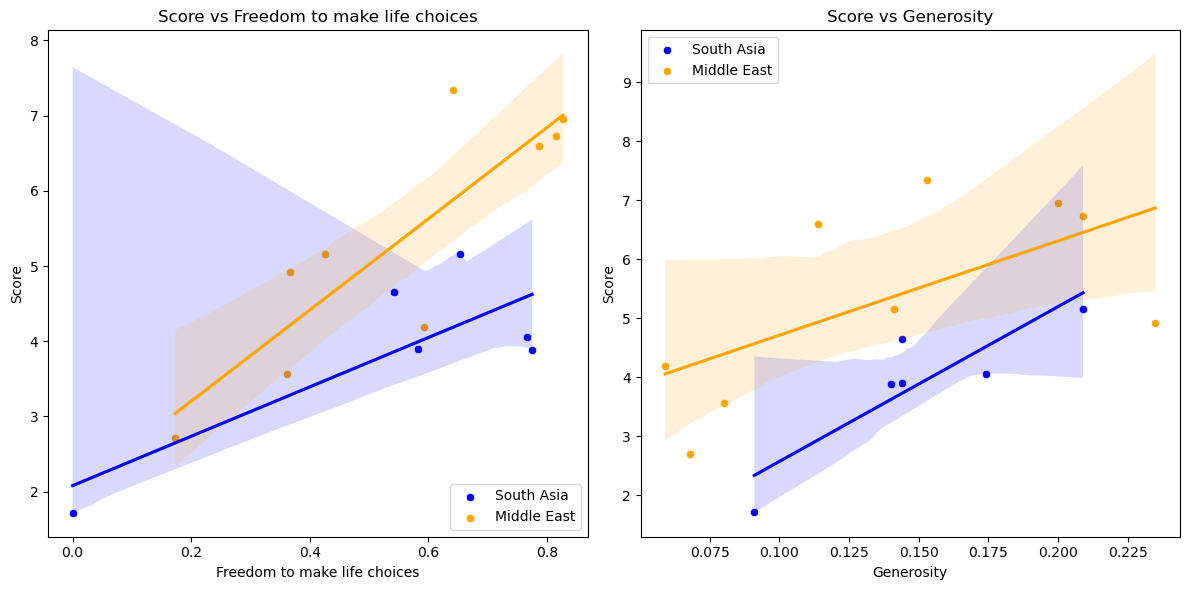

In [58]:
metrics = ['Freedom to make life choices', 'Generosity']

plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(data=south_asia_df, x=metric, y='score', label='South Asia', color='blue')
    sns.scatterplot(data=middle_east_df, x=metric, y='score', label='Middle East', color='orange')
    sns.regplot(data=south_asia_df, x=metric, y='score', scatter=False, color='blue', label=None)
    sns.regplot(data=middle_east_df, x=metric, y='score', scatter=False, color='orange', label=None)
    plt.title(f'Score vs {metric}')
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.legend()

plt.tight_layout()
plt.show()


# 6. Outlier Detection:
### • Identify outlier countries in both regions based on Score and GDP per Capita.

In [60]:
def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

south_asia_score_outliers = detect_outliers(south_asia_df, 'score')
south_asia_gdp_outliers = detect_outliers(south_asia_df, 'Log GDP per capita')

middle_east_score_outliers = detect_outliers(middle_east_df, 'score')
middle_east_gdp_outliers = detect_outliers(middle_east_df, 'Log GDP per capita')

outliers_combined = {
    'Region': ['South Asia', 'Middle East', 'South Asia', 'Middle East'],
    'Metric': ['Score', 'Score', 'GDP per Capita', 'GDP per Capita'],
    'Outlier Countries': [
        list(south_asia_score_outliers['Country name']),
        list(middle_east_score_outliers['Country name']),
        list(south_asia_gdp_outliers['Country name']),
        list(middle_east_gdp_outliers['Country name']),
    ],
}

outliers_df = pd.DataFrame(outliers_combined)
print(outliers_df)


        Region          Metric Outlier Countries
0   South Asia           Score     [Afghanistan]
1  Middle East           Score                []
2   South Asia  GDP per Capita     [Afghanistan]
3  Middle East  GDP per Capita                []


### • Plot these outliers and discuss their implications.

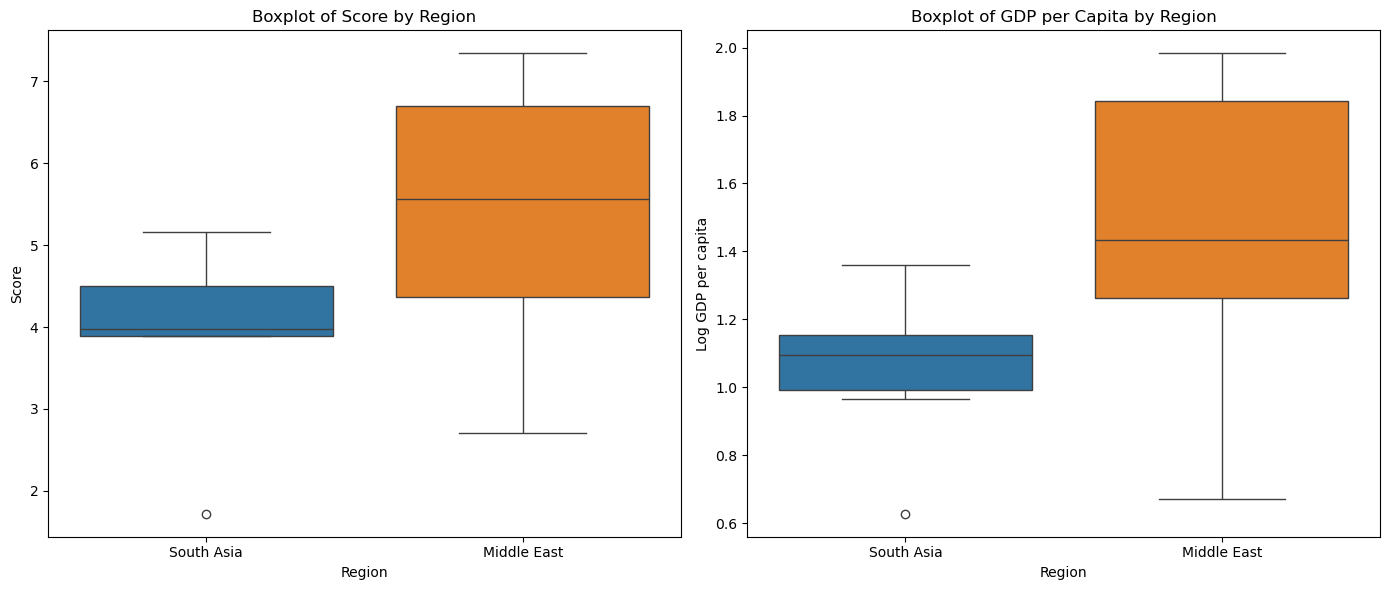

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

south_asia_df.loc[:, 'Region'] = 'South Asia'
middle_east_df.loc[:, 'Region'] = 'Middle East'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Combine both regions' data
combined_df = pd.concat([south_asia_df[['Country name', 'score', 'Log GDP per capita', 'Region']], 
                         middle_east_df[['Country name', 'score', 'Log GDP per capita', 'Region']]])

# Boxplot of Score by Region
sns.boxplot(x='Region', y='score', data=combined_df, ax=axes[0], hue='Region')
axes[0].set_title('Boxplot of Score by Region')
axes[0].set_ylabel('Score')

# Boxplot of GDP per Capita by Region
sns.boxplot(x='Region', y='Log GDP per capita', data=combined_df, ax=axes[1], hue='Region')
axes[1].set_title('Boxplot of GDP per Capita by Region')
axes[1].set_ylabel('Log GDP per capita')

plt.tight_layout()
plt.show()


# 7. Visualization:
### • Create boxplots comparing the distribution of Score between South Asia and the Middle East.

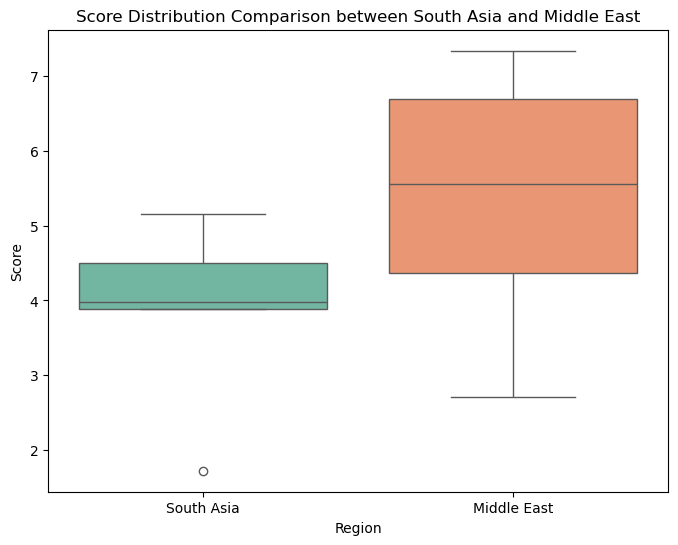

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

south_asia_df.loc[:, 'Region'] = 'South Asia'
middle_east_df.loc[:, 'Region'] = 'Middle East'

combined_df = pd.concat([south_asia_df[['Country name', 'score', 'Region']],
                         middle_east_df[['Country name', 'score', 'Region']]])

plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='score', data=combined_df, hue='Region', palette='Set2')
plt.title('Score Distribution Comparison between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()


### • Interpret the key differences in distribution shapes, medians, and outliers.